In [1]:
#Import all of the necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
import ipywidgets as widgets

import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               'size': 10,
              }
import sys
import glob #glob is helpful for searching for filenames or directories
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
from scipy.signal import blackmanharris as bh #for Blackman-Harris windowing
import pickle #for saving data

import mpld3

C:\Users\Physics\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [2]:
dts = ddm.genLogDist(1,2998,400)
dts2 = ddm.genLogDist(1,998,400)

In [3]:
Sample = ['allResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_256x256', 'allResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_2_256x256']

In [59]:
newt = lambda t,s: (1./s)*gamma(1./s)*t
px = 0.196
imDimension = 128
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))
imDimension2 = 256
q2 = np.arange(0,imDimension2/2)*2*np.pi*(1./(imDimension2*px))

In [60]:
#Load in the allResults file  
data_dir = "D:\\AllData_Results\\"
data_file = "Actin_256x256.p"

Ana_data = pickle.load(open(data_dir + data_file, 'r'))

In [62]:
Ana_data.keys()

['Actin_256_std_newtau', 'Actin_256_average_newtau']

In [65]:
def roughEstimate (diffusionCo = 0.3, slope = 2.0):
    taus = Ana_data['Actin_256_average_newtau']
    taustd = Ana_data['Actin_256_std_newtau']
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    ax.loglog(q2[3:-1], taus, 'ro')
    #ax.errorbar(q[3:-30], taus[:-29],yerr=taustd[:-29],fmt='o', elinewidth = 1.3, capsize=2)
    ax.plot(q2[3:-1], (1./diffusionCo) * 1./(q2[3:-1]**slope), '-k')
    ax.text(0.55,0.8,'D = %.4f' %diffusionCo, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.55,0.77,'slope = %.2f' %slope, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.set_ylabel(" Tau", fontdict=font_plt_ax)

In [66]:
a = ['Dilute','MT','Actin','Copoly']


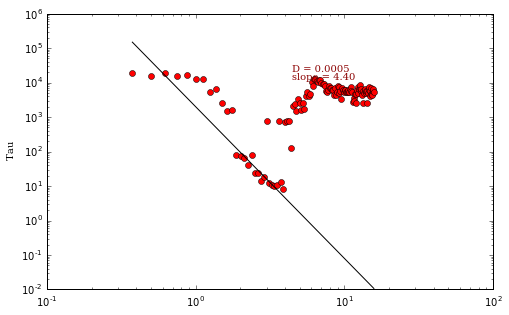

In [68]:
%matplotlib inline
mpld3.enable_notebook()
#chg = 2
interact(roughEstimate, diffusionCo = (0.0005,0.005,0.000005), slope = (2.0,6.0,0.05), continuous_update=False)

In [58]:
2/2.95

0.6779661016949152

In [ ]:
%matplotlib inline
mpld3.enable_notebook()

a = ['Dilute','MT','Actin','Copoly']
cc = ['ro', 'bo','go','mo']
diffusionCo = [0.309,0.039,0.0037,0.0031]


fig,ax = plt.subplots(figsize=(8,8/1.618))
for i in range(4):
    taus = Ana_data[a[i]+'_average_newtau']
    ax.loglog(taus,(2*np.pi)/q[3:-1],  cc[i])
ax.set_ylim(1.0,11)
#plt.savefig('E:\\AllData_Results\\AllConditions.svg')

    #ax.plot((1./diffusionCo[i]) * 1./(q[5:-42]**slope[i]), (2*np.pi)/q[5:-42],  '-k')


for i in range(4):
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    taus = Ana_data[a[i]+'_average_newtau']
    ax.loglog(taus,(2*np.pi)/q[3:-1],  cc[i])
    ax.plot((1./0.1) * 1./(q[2:-42]**2.0), (2*np.pi)/q[2:-42],  '-k')
    ax.set_ylim(1.0,11)
    #plt.savefig('E:\\AllData_Results\\'+a[i]+'Condition.svg')
    
    #ax.errorbar(q[3:-30],taus[:-29],yerr=taustd[:-29],fmt=cc[i], elinewidth = 1.3, capsize=2)